In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
tf.__version__

'2.12.0'

In [24]:
tf.config.list_physical_devices('GPU')

[]

In [25]:
#data augmentation

In [26]:
batch_size = 16
training_datagenerator = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, shear_range = 0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, validation_split=0.1)

In [27]:
path = r'C:\Users\bhavy\Downloads\archive (1)\Training Data'
train = training_datagenerator.flow_from_directory(path , target_size=(256,256), color_mode='rgb', class_mode='binary', batch_size=16, subset='training')

Found 12360 images belonging to 2 classes.


In [28]:
path = r'C:\Users\bhavy\Downloads\archive (1)\Training Data'
validation = training_datagenerator.flow_from_directory(path , target_size=(256,256), color_mode='rgb', class_mode='binary', batch_size=16, subset='validation')

Found 1373 images belonging to 2 classes.


In [29]:
# Initializing CNN 
cnn=tf.keras.models.Sequential()

#adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [30]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [31]:
#adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [32]:
#adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [33]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 256)       147712    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 256)     

In [34]:
#flatenning
cnn.add(tf.keras.layers.Flatten())




#fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [35]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 256)       147712    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 256)     

In [43]:
path = r'C:\Users\bhavy\Downloads\archive (1)\Models\fire_and_smoke_model.h5'
checkpoint= tf.keras.callbacks.ModelCheckpoint(path, monitor='val_loss',mode="min", save_best_only=True)
callbacks = [checkpoint]

In [44]:
#train cnn model
#compile
cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


In [45]:
cnn.fit_generator(train,  steps_per_epoch=train.samples//batch_size,epochs = 1,callbacks=callbacks, validation_data= validation, validation_steps=validation.samples//batch_size)


C:\Users\bhavy\AppData\Local\Temp\ipykernel_20556\3012021367.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train,  steps_per_epoch=train.samples//batch_size,epochs = 1,callbacks=callbacks, validation_data= validation, validation_steps=validation.samples//batch_size)


772/772 [==============================] - 1518s 2s/step - loss: 0.0724 - accuracy: 0.9840 - val_loss: 0.0121 - val_accuracy: 0.9949


In [46]:
#lets test it

In [47]:
from tensorflow.keras.models import load_model
path = r'C:\Users\bhavy\Downloads\archive (1)\Models\fire_and_smoke_model.h5'
cnn = load_model(path)

In [48]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 256)       147712    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 256)     

In [52]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [53]:
path = r"C:\Users\bhavy\Downloads\archive (1)\Training Data\fire\fire-99.2857487557.png"
test_image = image.load_img(path, target_size = (256,256))

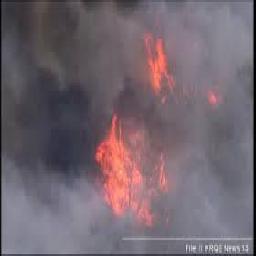

In [54]:
test_image

In [55]:
test_image = image.img_to_array(test_image)

In [56]:
test_image

array([[[  0.,   0.,   5.],
        [ 31.,  30.,  36.],
        [ 52.,  51.,  57.],
        ...,
        [ 61.,  62.,  67.],
        [  0.,   0.,   4.],
        [  0.,   0.,   2.]],

       [[  0.,   0.,   5.],
        [ 31.,  30.,  36.],
        [ 52.,  51.,  57.],
        ...,
        [ 61.,  62.,  67.],
        [  0.,   0.,   4.],
        [  0.,   0.,   2.]],

       [[ 12.,  11.,  17.],
        [ 47.,  46.,  52.],
        [ 68.,  67.,  73.],
        ...,
        [ 70.,  71.,  76.],
        [  6.,   5.,  10.],
        [  4.,   4.,   6.]],

       ...,

       [[ 20.,  21.,  25.],
        [ 91.,  92.,  96.],
        [141., 141., 149.],
        ...,
        [ 61.,  61.,  61.],
        [  7.,   7.,   7.],
        [  7.,   7.,   5.]],

       [[  8.,   9.,  13.],
        [ 58.,  59.,  63.],
        [ 85.,  85.,  93.],
        ...,
        [ 34.,  34.,  34.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  8.,   9.,  13.],
        [ 58.,  59.,  63.],
        [ 85.,  

In [57]:
test_image = test_image/255

In [58]:
test_image

array([[[0.        , 0.        , 0.01960784],
        [0.12156863, 0.11764706, 0.14117648],
        [0.20392157, 0.2       , 0.22352941],
        ...,
        [0.23921569, 0.24313726, 0.2627451 ],
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.01960784],
        [0.12156863, 0.11764706, 0.14117648],
        [0.20392157, 0.2       , 0.22352941],
        ...,
        [0.23921569, 0.24313726, 0.2627451 ],
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.00784314]],

       [[0.04705882, 0.04313726, 0.06666667],
        [0.18431373, 0.18039216, 0.20392157],
        [0.26666668, 0.2627451 , 0.28627452],
        ...,
        [0.27450982, 0.2784314 , 0.29803923],
        [0.02352941, 0.01960784, 0.03921569],
        [0.01568628, 0.01568628, 0.02352941]],

       ...,

       [[0.07843138, 0.08235294, 0.09803922],
        [0.35686275, 0.36078432, 0.3764706 ],
        [0.5529412 , 0

In [59]:
test_image = np.expand_dims(test_image, axis = 0)

In [60]:
test_image

array([[[[0.        , 0.        , 0.01960784],
         [0.12156863, 0.11764706, 0.14117648],
         [0.20392157, 0.2       , 0.22352941],
         ...,
         [0.23921569, 0.24313726, 0.2627451 ],
         [0.        , 0.        , 0.01568628],
         [0.        , 0.        , 0.00784314]],

        [[0.        , 0.        , 0.01960784],
         [0.12156863, 0.11764706, 0.14117648],
         [0.20392157, 0.2       , 0.22352941],
         ...,
         [0.23921569, 0.24313726, 0.2627451 ],
         [0.        , 0.        , 0.01568628],
         [0.        , 0.        , 0.00784314]],

        [[0.04705882, 0.04313726, 0.06666667],
         [0.18431373, 0.18039216, 0.20392157],
         [0.26666668, 0.2627451 , 0.28627452],
         ...,
         [0.27450982, 0.2784314 , 0.29803923],
         [0.02352941, 0.01960784, 0.03921569],
         [0.01568628, 0.01568628, 0.02352941]],

        ...,

        [[0.07843138, 0.08235294, 0.09803922],
         [0.35686275, 0.36078432, 0.3764706 ]

In [63]:
res = cnn.predict(test_image)

1/1 [==============================] - 0s 96ms/step


In [64]:
result = np.argmax(res, axis=1)

In [66]:
result

array([0], dtype=int64)

In [74]:
result[0]

0

In [75]:
categories = ['Fire' , 'Smoke']

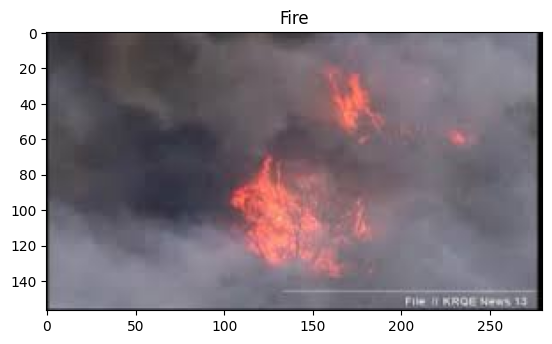

In [82]:
# if result[0] == 0:
#     print("It is Fire")
# else:
#     print("It is Smoke")  
 
img_show = PIL.Image.open(path) 
plt.imshow (img_show)  

plt.title(categories[int(result[0])])
plt.show()